# Cервис аренды самокатов GoFast

## Описание проекта

Имеются данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки:
* абонентская плата отсутствует;
* стоимость одной минуты поездки - 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra:
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.
1. Пользователи:
* user_id	- уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)
2. Поездки:
* user_id	- уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки
3. Подписки:
* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подписке
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
from math import factorial

Импортирую необходимые библиотеки.

In [2]:
try:
    df_1 = pd.read_csv('//Users/Elena/Desktop/users_go.csv')
except:
    df_1 = pd.read_csv('/Documents/users_go.csv')
    
df_1.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Загружаем таблицу с пользователями и знакомимся с её наполнением:
В таблице 5 столбцов. Формат столбцов подходит для значений, содержащихся в таблице.

In [4]:
df_1.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Посмотрим описательную статистику таблицы о пользователях:
* Количество пользователей в таблице - 1 534;
* Средний возраст пользователей - 25 лет, максимальный возраст 43 года.

In [5]:
try:
    df_2 = pd.read_csv('//Users/Elena/Desktop/rides_go.csv', parse_dates=['date'])
except:
    df_2 = pd.read_csv('/Documents/rides_go.csv')

df_2.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Загружаем таблицу с поездками и знакомимся с её наполнением:
В таблице 4 столбца. Формат не всех столбцов подходит для значений, содержащихся в таблице. Преобразуем некоторые значения в следюущем шаге.

In [7]:
df_2.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Посмотрим описательную статистику таблицы о поездках:
* Средняя дистанция поездки - 3 070 м, максимальная дистанция - 7 211 м. Большая часть пользователей не превышают дистанцию 3 776 м;
* Средняя продолжительность сессии - почти 18 минут, максимальная продолжительность сессии - почти 41 минута. Большая часть пользователей не превышают время в 21 минуту.

In [8]:
try:
    df_3 = pd.read_csv('//Users/Elena/Desktop/subscriptions_go.csv')
except:
    df_3 = pd.read_csv('/Documents/subscriptions_go.csv')
    
df_3.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Загружаем таблицу с типом подписок и знакомимся с её наполнением: В таблице 4 столбца. Формат всех столбцов подходит для значений, содержащихся в таблице.

In [10]:
df_3.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Посмотрим описательную статистику таблицы о типе подписок:
* В данной таблице приведены значения из условий задания о стоимости минуты, стоимости старта и стоимости подписки.

### Предобработка данных

In [11]:
df_2['date'] = pd.to_datetime(df_2['date'], format = '%Y-%m-%d')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Преобразуем формат столбца 'date' в таблице с поездками в формат даты.

In [12]:
df_1.isnull().sum()/len(df_1)*100

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [13]:
df_2.isnull().sum()/len(df_2)*100

user_id     0.0
distance    0.0
duration    0.0
date        0.0
dtype: float64

In [14]:
df_3.isnull().sum()/len(df_3)*100

subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

Проверила количество пропусков (в процентах) в каждой из таблиц. Пропуски отсутствуют.

In [15]:
df_1['user_id'].duplicated().sum()

31

In [16]:
df_1 = df_1.drop_duplicates(subset=['user_id'], keep='first')
df_1['user_id'].duplicated().sum()

0

In [17]:
df_2.duplicated().sum()

0

In [18]:
df_3.duplicated().sum()

0

Проверила наличие дубликатов в каждой из таблиц. В таблице с пользователями найден 31 дубликат (значение в столбце 'user_id' должно быть уникально). Удалила дубликаты. В остальных таблицах дубли отсутсвуют.

In [19]:
df_2['month'] = df_2['date'].dt.month
df_2.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Из преобразованного ранее столца 'date' выделю в отдельный столбец номер месяца.

In [20]:
df_2['date'].max()

Timestamp('2021-12-30 00:00:00')

In [21]:
df_2['date'].min()

Timestamp('2021-01-01 00:00:00')

Данные представлены ровно за год, агрегация по месяцам должна быть корректной.

### Исследовательский анализ данных

In [22]:
df_1['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

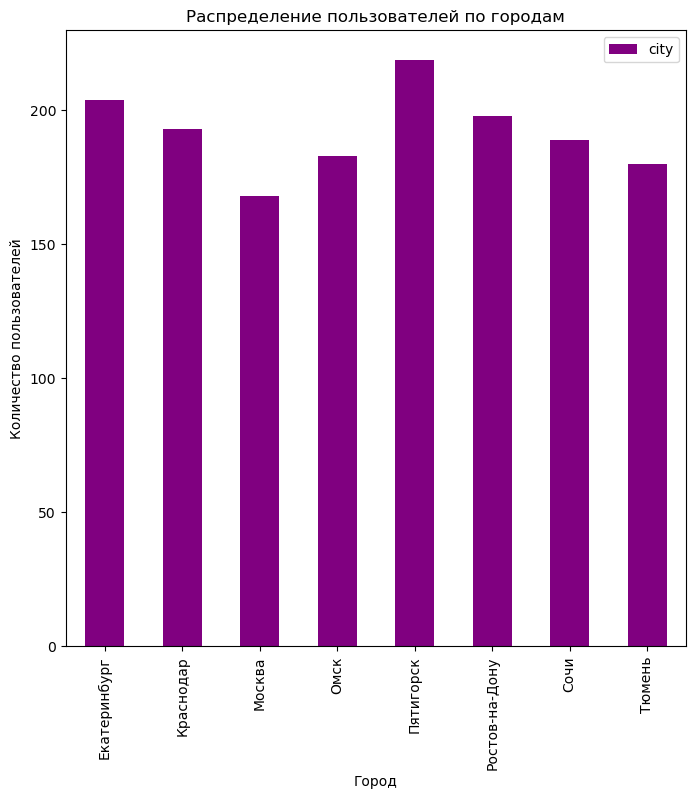

In [23]:
number_city = df_1.groupby('city').agg({'city': 'count'})
number_city.plot(kind = 'bar', color='purple', figsize=(8,8))
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по городам');

Сгруппируем и отсортируем данные по городам по убыванию. Наибольшее количество пользователей сервиса зарегистрировано в Пятигорсе, наименьшее в Москве. Это и объясняет большое количество записей в январе. Зимой в Москве достаточно проблематично кататься на самокате.

In [24]:
df_1['subscription_type'].value_counts()


free     835
ultra    699
Name: subscription_type, dtype: int64

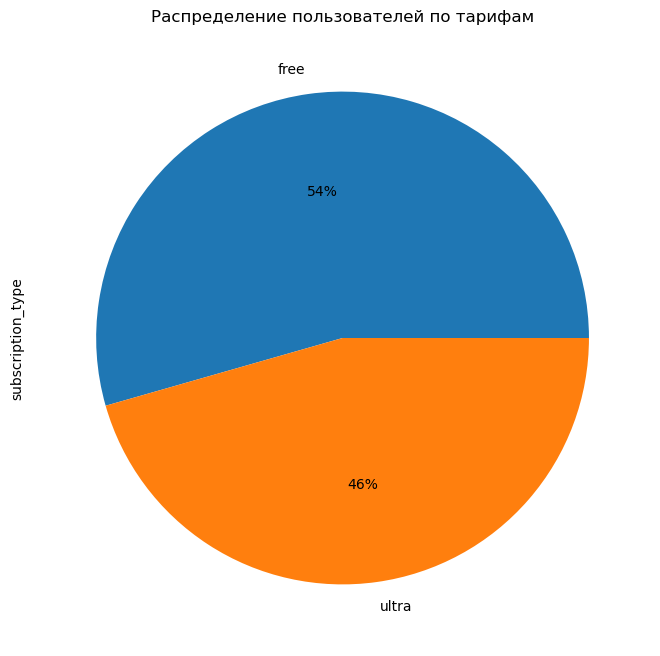

In [25]:
df_1['subscription_type'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=(8,8))
plt.title('Распределение пользователей по тарифам');

Распределение пользователей в датафрейме без подписки и с подпиской 54% и 46% человек соответственно. Наибольшее количество пользователей датафрейма не покупают подписку и платят за каждый "старт".

In [26]:
df_1['age'].value_counts()

25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

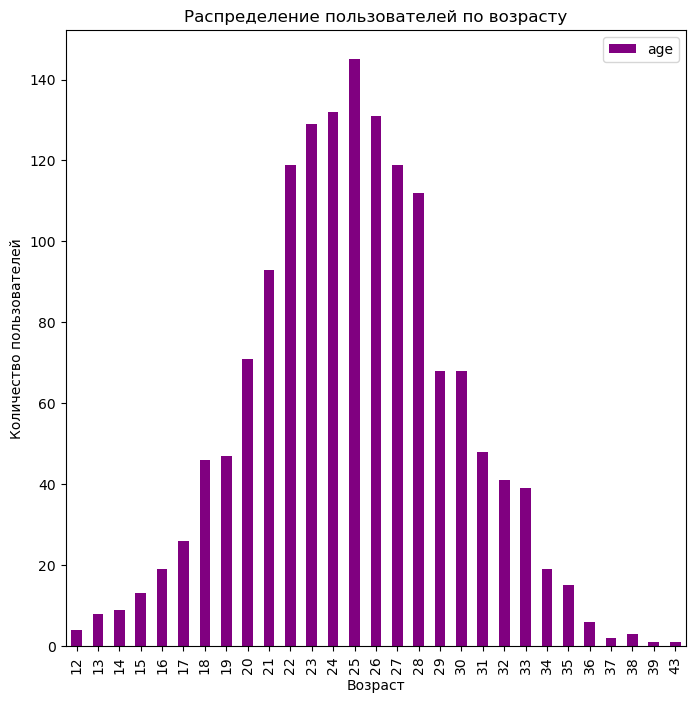

In [27]:
number_age = df_1.groupby('age').agg({'age': 'count'})
number_age.plot(kind = 'bar', color='purple', figsize=(8,8))
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по возрасту');

Как уже было замечено ранее при формировании описательной статистики по пользователям - средний возраст пользователе между 24 и 26 годами.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

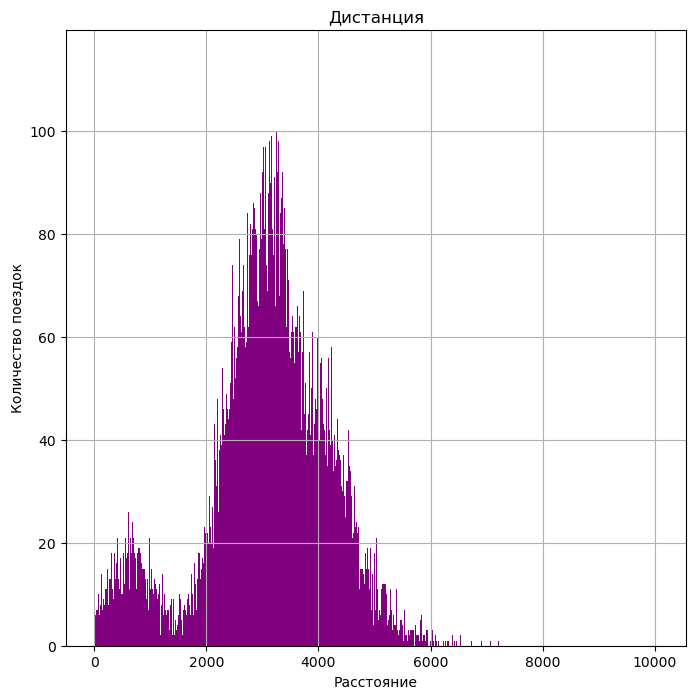

In [28]:
df_2.hist('distance', bins=1000, range=(0, 10050), figsize = (8,8), color='purple')
plt.title('Дистанция')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
df_2['distance'].describe()

По дистанции существует огромный разброс значений. Максимальное расстояние - 7 211 м, минимальное - менее одного метра.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

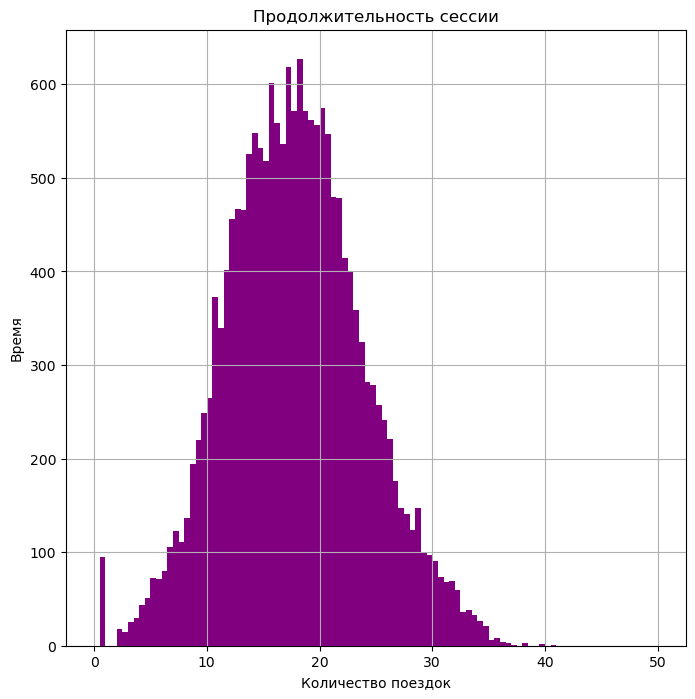

In [29]:
df_2.hist('duration', bins=100, range=(0, 50), figsize = (8,8), color='purple')
plt.title('Продолжительность сессии')
plt.xlabel('Количество поездок')
plt.ylabel('Время')
df_2['duration'].describe()

Для наглядности визуализирую некоторые значения, указанные ранее в описательной статистике. Например, продолжительность сесии. Среднее значение 18 минут, максимальное - практически 41.

### Объединение данных

In [30]:
len(df_1.index)

1534

In [31]:
len(df_2.index)

18068

In [32]:
len(df_3.index)

2

In [33]:
date = df_1.merge(df_2)
date = date.merge(df_3)
date.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


Объединила все 3 таблицы.

In [34]:
len(date.index)

18068

Проверила размерность таблиц. Количество строк в таблице с поездками совпадает с количеством строк в получившемся датафрейме. Объединение корректно.

In [35]:
date_free = date[date['subscription_type'] == 'free']
date_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Сформирую таблицу только из пользователей без подписки.

In [36]:
date_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


Рассмотрим описательную статистику для пользователей без подписки.

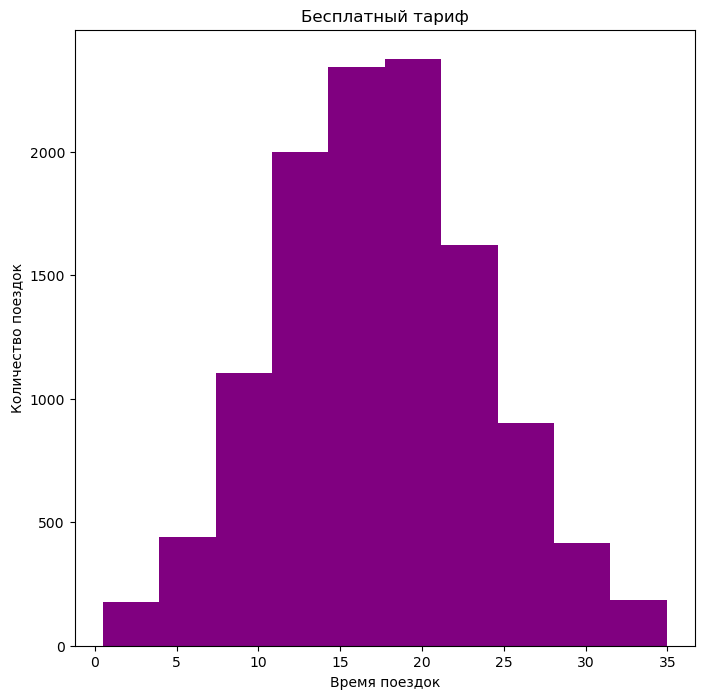

In [37]:
date_free.hist('duration', bins= 10 , grid= False, figsize=(8,8), color='purple')
plt.title('Бесплатный тариф')
plt.xlabel('Время поездок')
plt.ylabel('Количество поездок');

Рассмотрим зависимость времени поездок от количества поездок для пользователей без подписки. Наибольшее количество поездок занимает от 12 до 21 минуты - график демонтрирует информацию представленную ранее в описательной статистике (от первого до третьего квартиля).

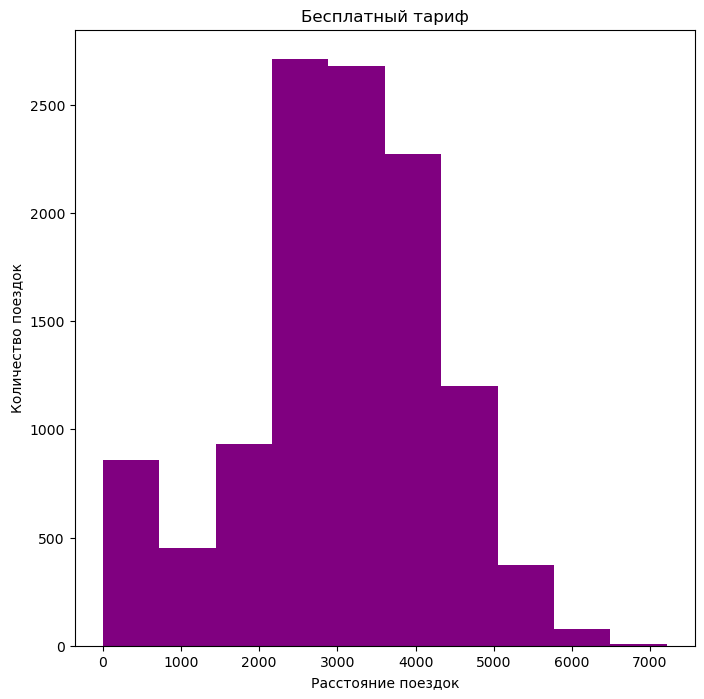

In [38]:
date_free.hist(column='distance', bins= 10 , grid= False, figsize=(8,8), color='purple')
plt.title('Бесплатный тариф')
plt.xlabel('Расстояние поездок')
plt.ylabel('Количество поездок');

Наибольшее количество поездок ограничиваются на расстоянии 2 366 до 3 905 м. Данный график так же визуализирует данные из описательной статистики выше.

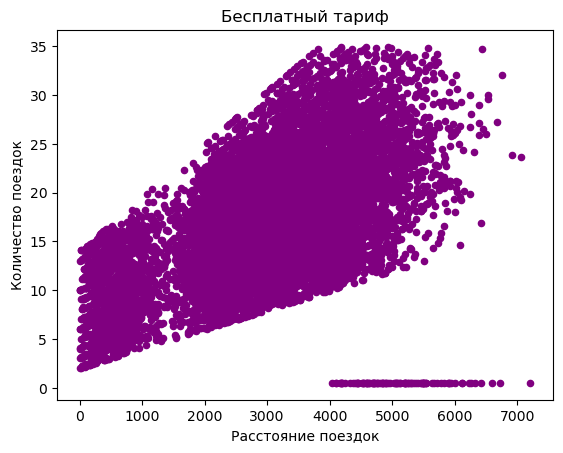

<Figure size 5000x5000 with 0 Axes>

In [39]:
date_free.plot.scatter(x = 'distance', y = 'duration', c='purple')
plt.title('Бесплатный тариф')
plt.xlabel('Расстояние поездок')
plt.ylabel('Количество поездок')
plt.figure(figsize=(50,50))
plt.show();

Данный график демонстрирует плотность расстояния и количества поездок. График не очень наглядный, тем не менее, можно заметить, что основная масса записей находятся на расстоянии до 4 000 м, далее в графике появляются пробелы, количество аномальных выбрасов незначительное.

In [40]:
date_ultra = date[date['subscription_type'] == 'ultra']
date_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Сформирую таблицу для пользователей с подпиской и абонентской платой.

In [41]:
date_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


Выведем описательную статистику для таких пользователей.

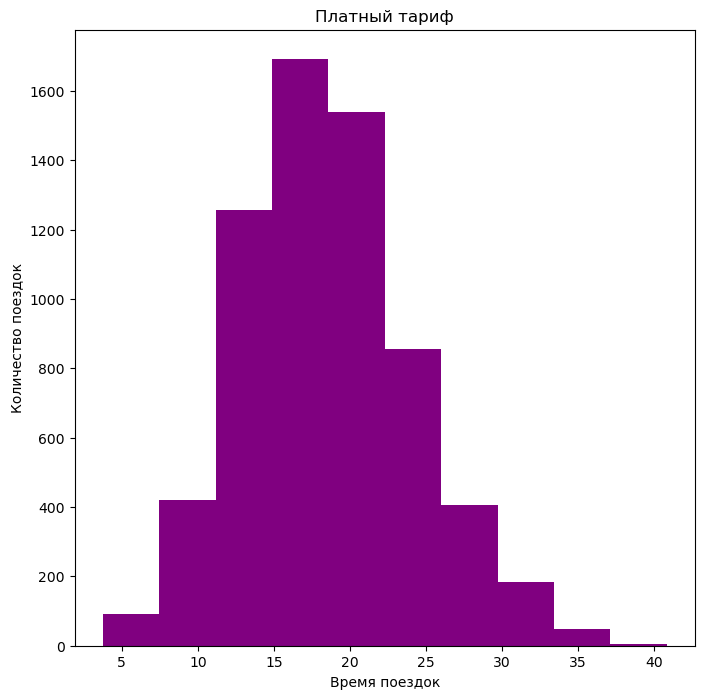

In [42]:
date_ultra.hist(column='duration', bins= 10 , grid= False , figsize=(8,8), color='purple')
plt.title('Платный тариф')
plt.xlabel('Время поездок')
plt.ylabel('Количество поездок')
plt.show();

Рассмотрим зависимость времени поездок от количества поездок для пользователей с подпиской. Наибольшее количество поездок занимает от 14 до 24 минут - график демонтрирует информацию представленную ранее в описательной статистике (от первого до третьего квартиля). Минимальное и максимальное время использования самоката пользователями с подпиской выше, чем у пользователей без подписки. Возможно, это связано с наличием абоненсткой платы и отсутствием платы за старт.

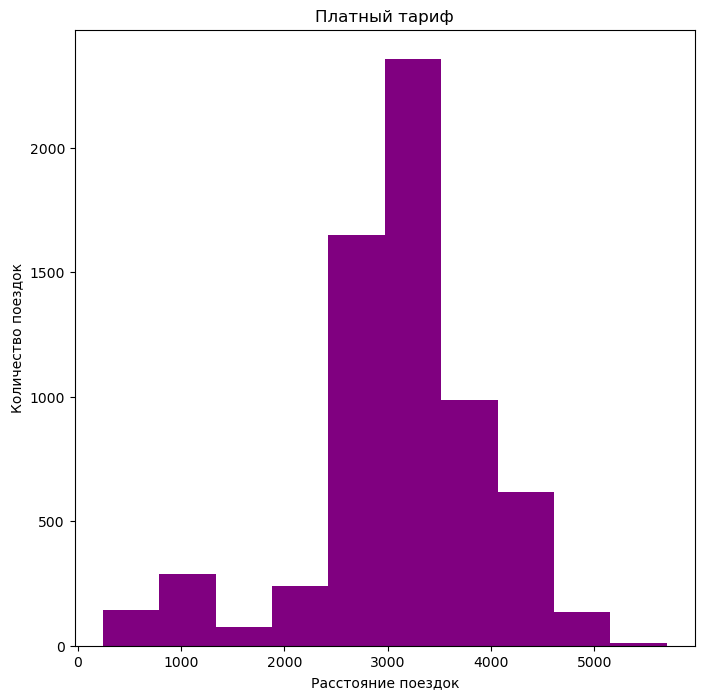

In [43]:
date_ultra.hist(column='distance', bins= 10 , grid= False, figsize=(8,8), color='purple')
plt.title('Платный тариф')
plt.xlabel('Расстояние поездок')
plt.ylabel('Количество поездок')
plt.show();

Наибольшее количество поездок ограничиваются на расстоянии 2 785 до 3 560 м. Данный график так же визуализирует данные из описательной статистики выше.

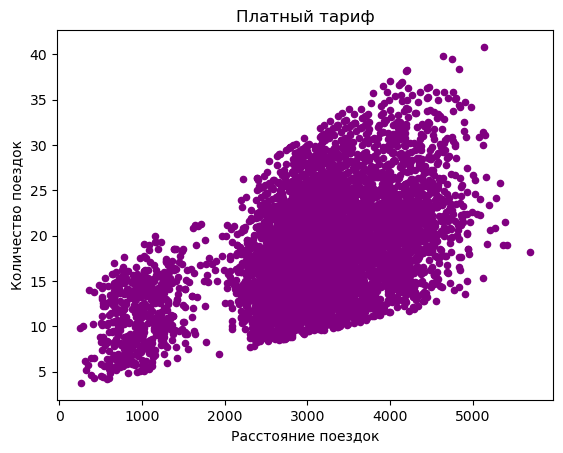

<Figure size 800x800 with 0 Axes>

In [44]:
date_ultra.plot.scatter(x = 'distance', y = 'duration', c='purple')
plt.title('Платный тариф')
plt.xlabel('Расстояние поездок')
plt.ylabel('Количество поездок')
plt.figure(figsize=(8,8))
plt.show();

Данный график демонстрирует плотность расстояния и количества поездок. График так же не очень наглядный, тем не менее, можно заметить, что основная масса записей находятся на расстоянии до 3 500 м, далее в графике появляются пробелы, количество аномальных выбасов незначительное.

### Подсчёт выручки

In [45]:
df_2['duration'] = np.ceil(df_2['duration'])
df_2.head()

,user_id,distance,duration,date,month
0,1,4409.919140,26.0,2021-01-01,1
1,1,2617.592153,16.0,2021-01-18,1
2,1,754.159807,7.0,2021-04-20,4
3,1,2694.783254,19.0,2021-08-11,8
4,1,4028.687306,27.0,2021-08-28,8


Округлю значения в столбце время поездки.

In [46]:
data_sum = pd.pivot_table(date,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : 'sum', 
                                      'name' : len,
                                      'subscription_type': max,
                                      })
data_sum.sort_values(by='month').head(10)

distance   duration  name subscription_type
month user_id                                                 
1     1         7027.511294  41.416640     2             ultra
      1061     12637.249630  41.127775     3              free
      1063      3276.362299   9.560836     1              free
      1064      5297.324649  14.224595     1              free
      1065     14547.099333  96.301646     4              free
      1066      2809.064949  18.022662     1              free
      1067      3864.900780  21.588668     1              free
      1069      7007.076943  50.760308     3              free
      1071      3635.094136  14.116980     1              free
      1072      2498.615999  10.814407     1              free

Для подсчёта выручки сформирую сводную таблицу, которая будет содержать расстояние, которое проехал пользователь, время поездки, количество поездок и тариф. Сгруппирую данную информацию по пользователям и месяцам.

In [47]:
data_sum.isnull().sum()/len(df_3)*100

distance             0.0
duration             0.0
name                 0.0
subscription_type    0.0
dtype: float64

Пропуски отсутствуют.

In [48]:
data_sum.rename(columns = {'name' : 'count_tips'}, inplace = True)

Переименую столбец name для более логичного представления информации.

In [49]:
data_sum['start'] = np.where(data_sum.subscription_type == 'free','50', '0').astype('int')
data_sum['sibscription'] = np.where(data_sum.subscription_type == 'free','0', '199').astype('int')
data_sum['sum_one_min'] = np.where(data_sum.subscription_type == 'free','8', '6').astype('int')
data_sum.sort_values(by='month').head(10)

distance   duration  count_tips subscription_type  start  \
month user_id                                                                 
1     1         7027.511294  41.416640           2             ultra      0   
      1061     12637.249630  41.127775           3              free     50   
      1063      3276.362299   9.560836           1              free     50   
      1064      5297.324649  14.224595           1              free     50   
      1065     14547.099333  96.301646           4              free     50   
      1066      2809.064949  18.022662           1              free     50   
      1067      3864.900780  21.588668           1              free     50   
      1069      7007.076943  50.760308           3              free     50   
      1071      3635.094136  14.116980           1              free     50   
      1072      2498.615999  10.814407           1              free     50   

               sibscription  sum_one_min  
month user_id                             
1     1                 199            6  
      1061                0            8  
      1063                0            8  
      1064                0            8  
      1065                0            8  
      1066                0            8  
      1067                0            8  
      1069                0            8  
      1071                0            8  
      1072                0            8

Для расчёта помесячной выручки, добавлю в сводную таблицу столбцы со стоимостью старта, стоимостью одной минуты поездки и стоимостью подписки для каждого пользователя.

In [50]:
data_sum['revenue'] = data_sum['start'] * data_sum['count_tips'] + data_sum['sum_one_min'] * data_sum['duration'] + data_sum['sibscription']
data_sum.head(10)

distance   duration  count_tips subscription_type  start  \
month user_id                                                                
1     1        7027.511294  41.416640           2             ultra      0   
      3        3061.777147  12.654443           1             ultra      0   
      5        3914.646990  12.395153           1             ultra      0   
      7        6478.080979  27.653450           2             ultra      0   
      12       3577.151148  32.462907           1             ultra      0   
      13       6687.987446  41.848947           2             ultra      0   
      14       7699.643820  33.700853           2             ultra      0   
      15       4187.621459  38.125729           1             ultra      0   
      20       3516.719208  28.231012           1             ultra      0   
      22       3058.692225  12.328329           1             ultra      0   

               sibscription  sum_one_min     revenue  
month user_id                                         
1     1                 199            6  447.499843  
      3                 199            6  274.926657  
      5                 199            6  273.370917  
      7                 199            6  364.920700  
      12                199            6  393.777441  
      13                199            6  450.093681  
      14                199            6  401.205117  
      15                199            6  427.754373  
      20                199            6  368.386070  
      22                199            6  272.969972

Расчитываем сумму выручки для каждого пользователя по формуле стоимость старта умножаем на количество поездок плюс стоимость одной минуты умножаем на время поездки плюс стоимость тарифа (если он есть).

In [51]:
data_sum.describe()

,distance,duration,count_tips,start,sibscription,sum_one_min,revenue
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,4896.362584,28.391223,1.594564,29.997352,79.610537,7.199894,336.512994
std,2911.516556,16.381399,0.831604,24.496519,97.496144,0.979861,151.182784
min,2.570787,0.500000,1.000000,0.000000,0.000000,6.000000,54.000000
25%,2972.202146,16.758129,1.000000,0.000000,0.000000,6.000000,230.776448
50%,3988.723985,23.573018,1.000000,50.000000,0.000000,8.000000,314.865493
75%,6421.375890,36.921430,2.000000,50.000000,199.000000,8.000000,409.661148
max,23429.487786,140.264426,7.000000,50.000000,199.000000,8.000000,1422.115405


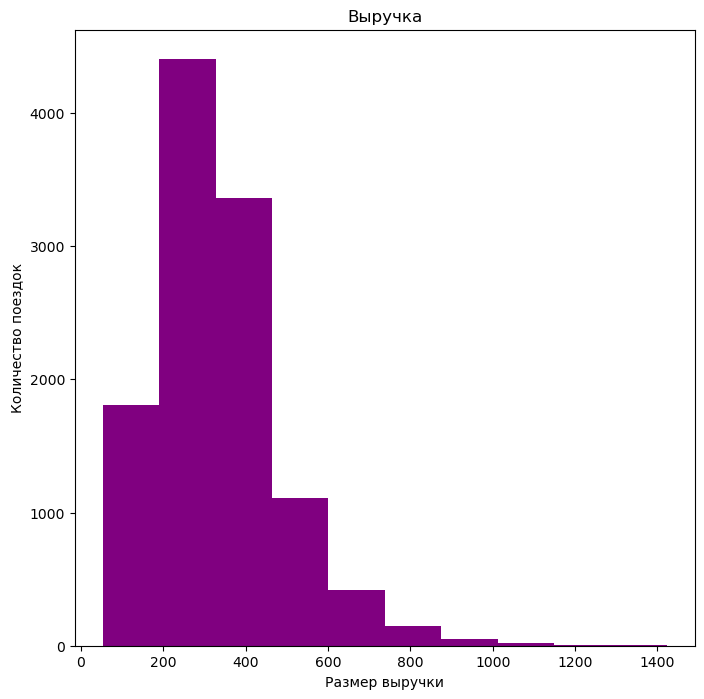

In [52]:
data_sum.hist(column='revenue', bins= 10 , grid= False, figsize=(8,8), color='purple')
plt.title('Выручка')
plt.xlabel('Размер выручки')
plt.ylabel('Количество поездок')
plt.show();

Посмотрим, как зависит размер выручки от количества поездок:
* Максимальная выручка составляет 1 428 ед.;
* Наибольший процент прибыли лежит в интервале от 234 до 412 ед.

### Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [53]:
ultra = date_ultra['duration'] 
free = date_free['duration']
results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Для ответа на вопрос проведу проверку гипотезы, что пользователи с подпиской тратят больше времени на поездки:
1. Н0 = Время поездки пользователей с подпиской равно времени поездки пользователей без подписки (date_ultra['duration'] = date_free['duration'])
2. Н1 = Время поездки пользователей с подпиской больше времени поездки пользователей без подписки (date_ultra['duration'] > date_free['duration'])

Вывод: По результатам проверки гипотезы, отвергаем "нулевую" гипотезу, т.е. время поездки пользователей с подпиской не равно времени поездки пользователей без подписки.

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

In [54]:
ultra = date_ultra['distance'] 
interested_value = 3130
results = st.ttest_1samp(ultra, 
                       interested_value,
                       alternative='greater')
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Для ответа на вопрос проведу проверку гипотезы, что пользователи максимальное расстоние поездки для пользователей с подпиской равно 3 130 м:
1. Н0 = Расстояние поездки пользователей с подпиской равно 3 130 м (date_ultra['distance'] = date_ultra['distance'])
2. Н1 = Расстояние поездки пользователей с подпиской больше 3 130 м (date_ultra['distance'] > date_ultra['distance'])

Вывод: По результатам проверки гипотезы, не получиось отвергаем "нулевую" гипотезу, т.е. нельзя признать, что максимальное расстояние поездки пользователей с подпиской равно 3 130 м.

3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [55]:
ultra_mounth_revenue = data_sum.loc[data_sum.subscription_type == 'ultra', 'revenue'] 
free_mounth_revenue = data_sum.loc[data_sum.subscription_type == 'free', 'revenue'] 
results = st.ttest_ind(ultra_mounth_revenue, 
                       free_mounth_revenue,
                       alternative = 'greater')
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.8999112105809456e-37
Отвергаем нулевую гипотезу


Для ответа на вопрос проведу проверку гипотезы, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки:
1. Н0 = Помесячная выручка от пользователей с подпиской равна помесячной выручки от пользователей без подписки;
2. Н1 = Помеячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки.

Вывод: По результатам проверки гипотезы отвергаем "нулевую" гипотезу, т.е. выручка от пользователей с подпиской больше выручки для пользователей без подписки.

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Т.к. изменения произошли в одной генеральной совокупности, считаю, что для проверки гепотизы о снижении количества обращений в поддержку, необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок.
Гипотезы в таком случае будут сформулированы так:
H0:μ1 = μ2
H1:μ1 ≠ μ2,
где μ1 и μ2 — средние значения до и после изменения.

### Общий вывод:

1. Для анализа было представлено три датафрейма с информациях о пользователях, их поездках на самакатах и тарифах на пользование сервисом;
2. Данные достаточно репрезентативны для анализа, количество дубликатов минимально;
3. Все пользователи разделены на два типа: с подпиской (абонентская плата 199 р/месяц, стоимость одной минуты - 6 рублей, плата за старт отсутствует) и без подписки (абонентская плата отсутствует, стоимость одной минуты поездки составляет 8 рублей, стоимость страта 50 рублей);
4. Распределение пользователей в датафрейме без подписки и с подпиской 835 и 699 человек соответственно. Пользователи сервиса предпочитают платить за каждый старт, нежели покупать подписку. Это может говорить о низкой лояльности к сервису и возможному наличию альтернативы;
5. Наибольшее количество пользователей сервиса зарегистрировано в Пятигорске, наименьшее в Москве. Это так же объясняет большое количество записей в январе и декабре;
6. Наибольшее количество пользователе находятся между 22 и 28 годами. Максимальный возраст - 43 года (1 человек). Распределение по возрасту логично - самокат более молодёжный способ передвижения. Для формирования программы лояльности и рекламных акций следует ориентироваться на интересы данного поколения;
7. Выделить тенденцию по дистанции практически не возможно, существует огромный разброс значений. Максимальное расстояние - 7 211 м, минимальное - менее одного метра;
8. Среднее значение продолжительности поездки составляет 18 минут, максимальное - практически 41 минута;
9. Рассмотрим отдельно информацию отдельно для пользователей без подпики:
* Наибольшее количество поездок занимает от 12 до 21 минуты;
* Наибольшее количество поездок ограничиваются на расстоянии 2 366 до 3 905 м;
10. Рассмотрим отдельно информацию для пользователей с подпиской:
* Наибольшее количество поездок занимает от 14 до 24 минут. Минимальное и максимальное время использования самоката пользователями с подпиской выше, чем у пользователей без подписки. Возможно, это связано с наличием абоненсткой платы и отсутствием платы за старт;
* Наибольшее количество поездок ограничиваются на расстоянии 2 785 до 3 560 м;
11. Максимальная выручка от одного пользвателя составляет 1 428 ед. Наибольший проент прибыли лежит в интервале от 234 до 412 ед.;
12. В ходе проверки гипотез выяснила следующее:
* Время поездки пользователей с подпиской не равно времени поездки пользователей без подписки;
* Нельзя признать, что максимальное расстояние поездки пользователей с подпиской равно 3 130 м;
* Выручка от пользователей с подпиской больше выручки для пользователей без подписки.
13. Для проверки гепотизы о снижении количества обращений в поддержку, необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок.